# T2-1. 타이타닉(Titanic) Simple Baseline

In [188]:
# 시험환경 세팅 (코드 변경 X)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def exam_data_load(df, target, id_name="", null_name=""):
    if id_name == "":
        df = df.reset_index().rename(columns={"index": "id"})
        id_name = 'id'
    else:
        id_name = id_name
    
    if null_name != "":
        df[df == null_name] = np.nan
    
    X_train, X_test = train_test_split(df, test_size=0.2, random_state=2021)
    
    y_train = X_train[[id_name, target]]
    X_train = X_train.drop(columns=[target])

    
    y_test = X_test[[id_name, target]]
    X_test = X_test.drop(columns=[target])
    return X_train, X_test, y_train, y_test 
    
df = pd.read_csv("C:\\Users\\kmo82\\Desktop\\Study\\Document\\train.csv")
X_train, X_test, y_train, y_test = exam_data_load(df, target='Survived', id_name='PassengerId')

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 11), (179, 11), (712, 2), (179, 2))

In [189]:
display(X_train, X_test, y_train, y_test) #df 한번에 출력 가능 

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
90,91,3,"Christmann, Mr. Emil",male,29.0,0,0,343276,8.0500,NaN,S
103,104,3,"Johansson, Mr. Gustaf Joel",male,33.0,0,0,7540,8.6542,NaN,S
577,578,1,"Silvey, Mrs. William Baird (Alice Munger)",female,39.0,1,0,13507,55.9000,E44,S
215,216,1,"Newell, Miss. Madeleine",female,31.0,1,0,35273,113.2750,D36,C
191,192,2,"Carbines, Mr. William",male,19.0,0,0,28424,13.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
621,622,1,"Kimball, Mr. Edwin Nelson Jr",male,42.0,1,0,11753,52.5542,D19,S
128,129,3,"Peter, Miss. Anna",female,NaN,1,1,2668,22.3583,F E69,C
57,58,3,"Novel, Mr. Mansouer",male,28.5,0,0,2697,7.2292,NaN,C
341,342,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
210,211,3,"Ali, Mr. Ahmed",male,24.0,0,0,SOTON/O.Q. 3101311,7.0500,NaN,S
876,877,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,S
666,667,2,"Butler, Mr. Reginald Fenton",male,25.0,0,0,234686,13.0000,NaN,S
819,820,3,"Skoog, Master. Karl Thorsten",male,10.0,3,2,347088,27.9000,NaN,S
736,737,3,"Ford, Mrs. Edward (Margaret Ann Watson)",female,48.0,1,3,W./C. 6608,34.3750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
494,495,3,"Stanley, Mr. Edward Roland",male,21.0,0,0,A/4 45380,8.0500,NaN,S
871,872,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
530,531,2,"Quick, Miss. Phyllis May",female,2.0,1,1,26360,26.0000,NaN,S
157,158,3,"Corn, Mr. Harry",male,30.0,0,0,SOTON/OQ 392090,8.0500,NaN,S


,PassengerId,Survived
90,91,0
103,104,0
577,578,1
215,216,1
191,192,0
...,...,...
621,622,1
128,129,1
57,58,0
341,342,1


,PassengerId,Survived
210,211,0
876,877,0
666,667,0
819,820,0
736,737,0
...,...,...
494,495,0
871,872,1
530,531,1
157,158,0


In [190]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 90 to 116
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Pclass       712 non-null    int64  
 2   Name         712 non-null    object 
 3   Sex          712 non-null    object 
 4   Age          575 non-null    float64
 5   SibSp        712 non-null    int64  
 6   Parch        712 non-null    int64  
 7   Ticket       712 non-null    object 
 8   Fare         712 non-null    float64
 9   Cabin        170 non-null    object 
 10  Embarked     711 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 66.8+ KB


In [191]:
y_train['Survived'].value_counts()

Survived
0    441
1    271
Name: count, dtype: int64

In [192]:
X_train=X_train.select_dtypes(exclude='object') #object를 제외한 데이터 타입만 출력
X_train.info()


<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 90 to 116
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Pclass       712 non-null    int64  
 2   Age          575 non-null    float64
 3   SibSp        712 non-null    int64  
 4   Parch        712 non-null    int64  
 5   Fare         712 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 38.9 KB


In [193]:
X_train.drop(columns=['PassengerId'], inplace=True) #PassengerId 컬럼 삭제

In [194]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier()
model.fit(X_train, y_train['Survived'])

RandomForestClassifier()

In [195]:

X_test=X_test.select_dtypes(exclude='object')
X_test.drop(columns=['PassengerId'], inplace=True)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179 entries, 210 to 45
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  179 non-null    int64  
 1   Age     139 non-null    float64
 2   SibSp   179 non-null    int64  
 3   Parch   179 non-null    int64  
 4   Fare    179 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 8.4 KB


In [196]:
prediction=model.predict(X_test)
prediction

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0])

In [197]:
value=y_test['Survived']

In [198]:
from sklearn.metrics import *

In [199]:
acc=accuracy_score(value, prediction)
acc

0.664804469273743

In [200]:
df = pd.read_csv("C:\\Users\\kmo82\\Desktop\\Study\\Document\\train.csv")
X_train, X_test, y_train, y_test = exam_data_load(df, target='Survived', id_name='PassengerId')

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 11), (179, 11), (712, 2), (179, 2))

In [201]:
X_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
210,211,3,"Ali, Mr. Ahmed",male,24.0,0,0,SOTON/O.Q. 3101311,7.0500,NaN,S
876,877,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,S
666,667,2,"Butler, Mr. Reginald Fenton",male,25.0,0,0,234686,13.0000,NaN,S
819,820,3,"Skoog, Master. Karl Thorsten",male,10.0,3,2,347088,27.9000,NaN,S
736,737,3,"Ford, Mrs. Edward (Margaret Ann Watson)",female,48.0,1,3,W./C. 6608,34.3750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
494,495,3,"Stanley, Mr. Edward Roland",male,21.0,0,0,A/4 45380,8.0500,NaN,S
871,872,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
530,531,2,"Quick, Miss. Phyllis May",female,2.0,1,1,26360,26.0000,NaN,S
157,158,3,"Corn, Mr. Harry",male,30.0,0,0,SOTON/OQ 392090,8.0500,NaN,S


In [202]:
features=['Pclass', 'Sex', 'SibSp', 'Parch', 'Age']
X = pd.get_dummies(X_train[features])
X_test = pd.get_dummies(X_test[features])


In [203]:
model=RandomForestClassifier()
model.fit(X, y_train['Survived'])

RandomForestClassifier()

In [204]:
prediction=model.predict(X_test)
prediction

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0])

In [205]:
accuracy_score(value, prediction)

0.7597765363128491

In [206]:
df = pd.read_csv("C:\\Users\\kmo82\\Desktop\\Study\\Document\\train.csv")
X_train, X_test, y_train, y_test = exam_data_load(df, target='Survived', id_name='PassengerId')

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 11), (179, 11), (712, 2), (179, 2))

In [207]:
df=pd.concat([X_train, X_test])
df.info() #Cabin: 객실 번호

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 90 to 45
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [208]:
df['Age']=df['Age'].fillna(df['Age'].mean()) #결측치 뭘로 채울지 생각..
df['Cabin']=df['Cabin'].fillna('N')
df['Embarked']=df['Embarked'].fillna('N')
df=df.drop(['Name'],axis=1)
df=df.drop(['PassengerId'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 90 to 45
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Ticket    891 non-null    object 
 6   Fare      891 non-null    float64
 7   Cabin     891 non-null    object 
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(3), object(4)
memory usage: 69.6+ KB


In [209]:
from sklearn.preprocessing import LabelEncoder #문자열을 숫자로 변환
le = LabelEncoder()
en_col=['Sex', 'Ticket', 'Cabin', 'Embarked']
df[en_col]=df[en_col].apply(le.fit_transform)

df['Age']=df['Age'].astype(int) #data type float-> int로 변환
df

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
90,3,1,29,0,0,298,8.0500,146,3
103,3,1,33,0,0,505,8.6542,146,3
577,1,0,39,1,0,72,55.9000,128,3
215,1,0,31,1,0,416,113.2750,103,0
191,2,1,19,0,0,227,13.0000,146,3
...,...,...,...,...,...,...,...,...,...
494,3,1,21,0,0,518,8.0500,146,3
871,1,0,47,1,1,54,52.5542,102,3
530,2,0,2,1,1,180,26.0000,146,3
157,3,1,30,0,0,654,8.0500,146,3


In [210]:
X_train=df[:len(X_train)]
X_test=df[len(X_train):]
X_train.shape, X_test.shape

((712, 9), (179, 9))

In [211]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

rf.fit(X_train, y_train['Survived'])

RandomForestClassifier()

In [212]:
pred = rf.predict(X_test)
pred

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0])

In [213]:
pred = pd.DataFrame({'PassengerId': list(X_test.index), 'Survived': pred})
pred


,PassengerId,Survived
0,210,0
1,876,0
2,666,0
3,819,0
4,736,0
...,...,...
174,494,0
175,871,1
176,530,1
177,157,0


In [214]:
rf.score(X_test, y_test['Survived'])

0.7486033519553073

# T2-2. Pima Indians Diabetes(피마 인디언 당뇨병)

In [240]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def exam_data_load(df, target, id_name="", null_name=""):
    if id_name == "":
        df = df.reset_index().rename(columns={"index": "id"})
        id_name = 'id'
    else:
        id_name = id_name
    
    if null_name != "":
        df[df == null_name] = np.nan
    
    X_train, X_test = train_test_split(df, test_size=0.2, random_state=2021)
    
    y_train = X_train[[id_name, target]]
    X_train = X_train.drop(columns=[target])

    
    y_test = X_test[[id_name, target]]
    X_test = X_test.drop(columns=[target])
    return X_train, X_test, y_train, y_test 
    
df = pd.read_csv("C:\\Users\\kmo82\\Downloads\\diabetes.csv")
X_train, X_test, y_train, y_test = exam_data_load(df, target='Outcome')

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 9), (154, 9), (614, 2), (154, 2))

In [241]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

rf.fit(X_train, y_train['Outcome'])
pred = rf.predict(X_test)
rf.score(X_test, y_test['Outcome'])

0.7727272727272727

In [242]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [248]:
X_train

,id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
147,147,2,106,64,35,119,30.5,1.400,34
344,344,8,95,72,0,0,36.8,0.485,57
390,390,1,100,66,29,196,32.0,0.444,42
150,150,1,136,74,50,204,37.4,0.399,24
132,132,3,170,64,37,225,34.5,0.356,30
...,...,...,...,...,...,...,...,...,...
621,621,2,92,76,20,0,24.2,1.698,28
128,128,1,117,88,24,145,34.5,0.403,40
57,57,0,100,88,60,110,46.8,0.962,31
341,341,1,95,74,21,73,25.9,0.673,36


In [249]:
# 1사분위수(Q1)와 3사분위수(Q3)를 스칼라 값으로 계산

Q1 = X_train['Insulin'].quantile(q=0.25)
Q3 = X_train['Insulin'].quantile(q=0.75)

# IQR 계산
IQR = Q3 - Q1

# IQR을 이용해 이상치를 'Insulin'의 중간값으로 대체
X_train.loc[(X_train['Insulin'] < Q1 - 1.5 * IQR) | (X_train['Insulin'] > Q3 + 1.5 * IQR), 'Insulin'] = X_train['Insulin'].median()
X_train


,id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
147,147,2,106,64,35,119,30.5,1.400,34
344,344,8,95,72,0,0,36.8,0.485,57
390,390,1,100,66,29,196,32.0,0.444,42
150,150,1,136,74,50,204,37.4,0.399,24
132,132,3,170,64,37,225,34.5,0.356,30
...,...,...,...,...,...,...,...,...,...
621,621,2,92,76,20,0,24.2,1.698,28
128,128,1,117,88,24,145,34.5,0.403,40
57,57,0,100,88,60,110,46.8,0.962,31
341,341,1,95,74,21,73,25.9,0.673,36


In [250]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

rf.fit(X_train, y_train['Outcome'])

RandomForestClassifier()

In [251]:
pred = rf.predict(X_test)
pred

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0])

In [252]:
rf.score(X_test, y_test['Outcome'])

0.7987012987012987

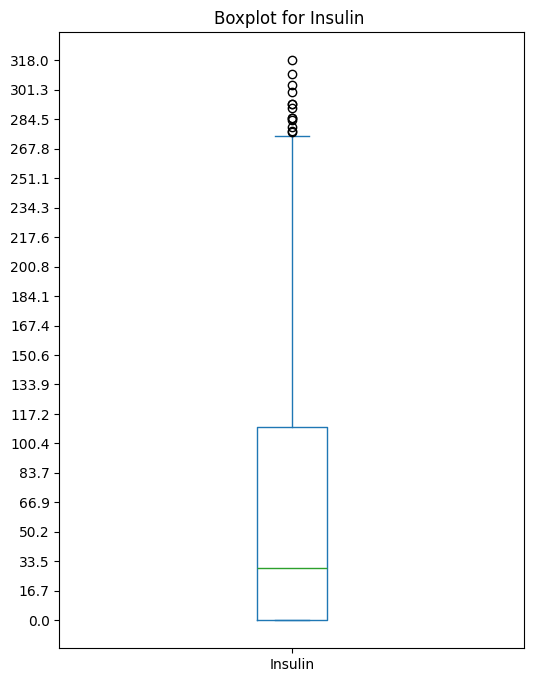

In [253]:
import matplotlib.pyplot as plt

import numpy as np

# 특정 열에 대한 박스플롯 그리기
plt.figure(figsize=(6, 8))
df['Insulin'].plot(kind='box')
plt.title("Boxplot for Insulin ")

# y축 눈금 조정 (예: 최솟값 ~ 최댓값 구간을 20개로 나눔)
y_min = df['Insulin'].min()
y_max = df['Insulin'].max()
plt.yticks(np.linspace(y_min, y_max, 20))

plt.show()

# T2-6. Bike-Regressor

In [347]:
train = pd.read_csv("C:\\Users\\kmo82\\Downloads\\train.csv")
test = pd.read_csv("C:\\Users\\kmo82\\Downloads\\test.csv")

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [349]:
train['datetime'] = pd.to_datetime(train['datetime'])
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['weekday'] = train['datetime'].dt.weekday

test['datetime'] = pd.to_datetime(test['datetime'])
test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour
test['weekday'] = test['datetime'].dt.weekday

test_date = test['datetime']

In [342]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int32         
 13  month       10886 non-null  int32         
 14  day         10886 non-null  int32         
 15  hour        10886 non-null  int32         
 16  weekday     10886 non-

In [343]:
from sklearn.model_selection import train_test_split

train.drop(columns=['datetime','casual', 'registered'], inplace=True)
test.drop(columns=['datetime'], inplace=True)

X_train, X_val, y_train, y_val = train_test_split(train, train['count'], test_size=0.2, random_state=2023)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

X_train.drop(columns=['count'], inplace=True)
X_val.drop(columns=['count'], inplace=True)

In [344]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

rf.fit(X_train, y_train)

pred=rf.predict(test)

In [345]:
pred
pred=pd.DataFrame({'datetime': test_date, 'count': pred})

In [346]:
pred.to_csv("sub.csv", index=False)